<a href="https://colab.research.google.com/github/akhan126/Github-and-Jupyter-setup/blob/main/copy_of_mesa8410_session_2_fall_2024_when_to_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When to Visualize Your Data

## Section 1: When Visualizing Helps: You should ALWAYS ALWAYS ALWAYS visualize at EVERY step and then MORE VISUALIZING

We're going to start by considering several examples of when visualizing can be a vital part of a data science pipeline

### **Example 1a: Ansombe's Quartet**

First, we will load Anscombe's Quartet dataset using `pandas` and explore its structure. We're especially interested in investigating the relationship between x and y in each of four groups.

Run the code below to load the data and take a quick look at the raw table, as we often do when we're getting started.

#### Step 1: Loading and viewing raw data

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Anscombe's Quartet dataset from seaborn
df = sns.load_dataset('anscombe')

# Display dataframe and take a look at it:
display(df)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


The dataset contains four groups (I, II, III, IV) with x and y values for each group.

**Discuss (briefly): what do you notice about the printed out data above? What do you wonder?**



#### Step 2: Statistical Summary of the Datasets

Before we visualize the data, let's look at the basic statistical summaries (mean, variance, correlation) of each group.

We'll be using a similar idea to last week's Olympics work where we grouped the data by country and then ran some summary function in each group, using "groupby" and "agg" (aggregate). It then rounds things to the nearest 2 decimal points for the sake of tidiness.

Regarding *rounding*, in general, it would not be a good idea to round your data this early, except for the purposes of presentation. A good rule of thumb is to keep all of the precision that you have, until you decide what level of precision is appropriate for modeling and reporting purposes. *For example, if a dataset contains measurements of people's heights and weights to the nearest inch and pound, it would be inappropriate to report BMIs to 10 dp, since the original data did not have that many significant figures.*

In [ ]:
# Group by the dataset and calculate statistical summaries:
# mean of x and y, standard deviation of x and y (then round)
summary = df.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std'],
}).round(2)

display(summary)

x          y      
        mean   std mean   std
dataset                      
I        9.0  3.32  7.5  2.03
II       9.0  3.32  7.5  2.03
III      9.0  3.32  7.5  2.03
IV       9.0  3.32  7.5  2.03

**What do we notice? In your opinion, is there a relationship between x and y in each of the groups? Is that relationship the same or different across the groups?**

#### Step 2.5: Quick programming aside: for loops

*Let's introduce "for loops" to see how they work before our next step:*

Instead of doing the groupby and aggregate method again to work on each of our four datasets, another way to do something again and again for different groups is to loop through the groups one by one

For loops are really versatile across all different kinds of programming: essentially, a "for" loop will do the same set of verbs/functions/steps "for" each of several nouns/inputs

They may not always be the fastest way to accomplish something, but this won't matter much till later in the program when we work with much larger datsets.

In [ ]:
# People often use "i" short for "iterator" to name the thing that keeps changing each loop
for i in [1, 2, 3, 4, 5, 6]:
    print(i)

1
2
3
4
5
6


In [ ]:
# You can iterate through anything you like. Oftentimes, you'll iterate through an array.
# You could use the "range" function to make an array of numbers (up to but excluding the second input)


thing_to_iterate_through = range(100, 105)  # starts at first input, stops before second input
for i in thing_to_iterate_through:
    print(i)


thing_to_iterate_through_2 = range(4) # four numbers, starting at zero, stopping before 4 (Python always likes to start at zero)
for i in thing_to_iterate_through_2:
    print(i)

100
101
102
103
104
0
1
2
3


*We'll often want to calculate something during each loop, and store them all by "appending" them to the end of an empty array that we create before we start*

In [ ]:
squares = []

for i in range(0, 10):
    square = i**2
    squares.append(square)

print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


*For more on for loops, you can check out [this Khan Academy video](https://www.youtube.com/watch?v=9LgyKiq_hU0) later.*

#### Step 3: Let's calculate the correlations between x and y for our Anscombe's Quartet

In [ ]:
# First, we need a way to describe each of the four datasets
dataset_names = ["I", "II", "III", "IV"]
# Next, create an empty array to hold the correlations we're about to calculate (often useful when using loops)
correlations = []

# So, one at a time for each dataset:
for one_name in dataset_names:
    # First, grab all the rows that have "one_name" in the "dataset" column, call the new thing "one_dataset"
    one_dataset = df[df['dataset'] == one_name]
    # Calculate the correlation between x and y within this group
    corr = one_dataset['x'].corr(one_dataset['y']).round(4)
    # Store the correlation we just calculated at the end of the correlations array
    correlations.append(corr)
    # After these steps, the loop will start again, updating "one_name" to the next value in "dataset_names"

# Add these to our existing summary table:
# create a new column called "correlation" and make its values be the array we just filled up
summary['correlation'] = correlations
summary

x          y       correlation
        mean   std mean   std            
dataset                                  
I        9.0  3.32  7.5  2.03      0.8164
II       9.0  3.32  7.5  2.03      0.8162
III      9.0  3.32  7.5  2.03      0.8163
IV       9.0  3.32  7.5  2.03      0.8165

As you can see, all four datasets have nearly identical statistical summaries:

- Mean of x and y values
- Standard deviations of x and y values
- Correlation between x and y values

To further investigate the relationship between x and y in this dataset, let's see what happens when we fit a linear regression within each group. (Four regression lines, one for each group).

In [ ]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Loop through each dataset and fit a regression model, printing out the slope, intercept, and R^2
for one_name in dataset_names:

    # Grab just one dataset, as previously
    one_dataset = df[df['dataset'] == one_name]

    # Extract x and y values from this one dataset in the format sklearn expects
    X = one_dataset['x'].values.reshape(-1, 1)  # (don't worry about these details for now)
    y = one_dataset['y'].values

    # Create and fit a linear regression model, call it "model"
    model = LinearRegression().fit(X, y)

    # From "model", extract slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    # Print the slope and intercept, formatting and rounding things along the way
    print(f"Dataset: {one_name}")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R^2: {r_squared:.4f}")
    print("\n")                         # Print a newline for better readability

Dataset: I
Slope: 0.5001
Intercept: 3.0001
R^2: 0.6665


Dataset: II
Slope: 0.5000
Intercept: 3.0009
R^2: 0.6662


Dataset: III
Slope: 0.4997
Intercept: 3.0025
R^2: 0.6663


Dataset: IV
Slope: 0.4999
Intercept: 3.0017
R^2: 0.6667




#### Step 3.5: Quick programming aside: pretty printing

- **Basic `print()`**: Displays values in a basic format, which can look cluttered when printing multiple items.
- **`f-strings` (`print(f)`)**:
  - **Embedding Variables**: You can directly include variables within the `{}` braces inside the string.
  - **Formatting Numbers**: The `{score:.2f}` formats the number to two decimal places, making it cleaner and more readable.
  - **Adding Text**: You can include additional text within the string to give context to the values.

In [ ]:
# Example: here are some named variables:
name = "Isabella"
age = 35
score = 96.56789

# Simple print statements without formatting
print("Name:", name)
print("Age:", age)
print("Score:", score)

# Using print(f) with f-strings for pretty printing
print("\nUsing f-strings for Pretty Printing:")
print(f"{name} is {age} years old and got a score of {score:.2f}")

Name: Isabella
Age: 35
Score: 96.56789

Using f-strings for Pretty Printing:
Isabella is 35 years old and got a score of 96.57


####Step 4: Visualizing Anscombe's Quartet

Finally, let's visualize the relationships between x and y using scatterplots. We're not going to focus on how the code works for this today: we'll learn more about data visualization in week 11 of this course, and next summer in our *Data Visualization and Storytelling* course.

**Before running the below code, think about what you expect to see.**

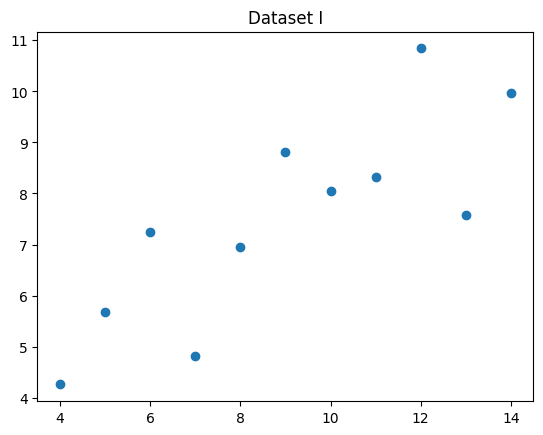

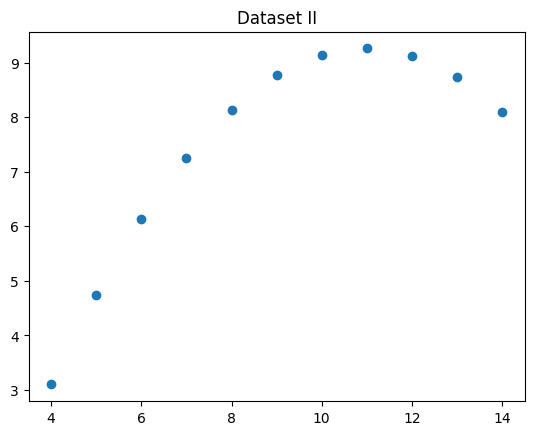

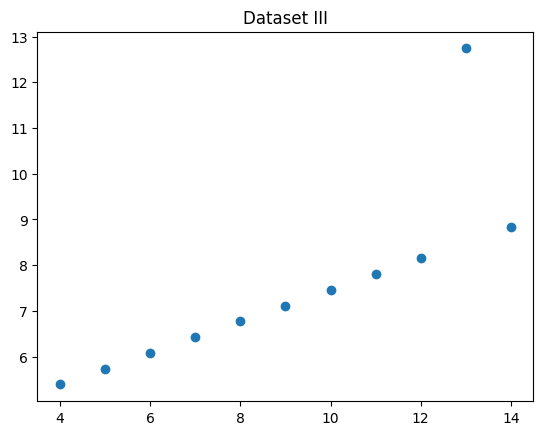

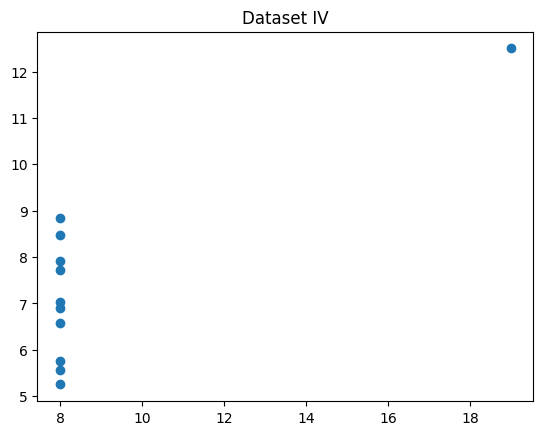

In [ ]:
# Loop through each dataset and create a scatter plot
for dataset in dataset_names:

    # Filter data for the current dataset
    data = df[df['dataset'] == dataset]

    # Create a scatter plot of the data
    plt.scatter(data['x'], data['y'])

    # Add titles (using pretty printing as we discussed above)
    plt.title(f"Dataset {dataset}")

    # Show the plot
    plt.show()

# NOTE: by default, plots choose where to "zoom" their vertical and horizontal axes to include all the points, but not much else
# This means that these plots each have slightly different axes, which is NOT good practice for comparing across plots
# We can, and later will, override the defaults to give specific ranges, like "x-axis from 0 to 10"

### **Example 1b: Datasaurus Dozen**

Now it's your turn! We're going to practice working with for loops again, and investigate a new dataset, known as the Datasaurus Dozen.

Source: Justin Matejka and George Fitzmaurice. 2017. Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems. Association for Computing Machinery, New York, NY, USA, 1290-1294. DOI: https://doi.org/10.1145/3025453.3025912.

In [ ]:
# Load the Datasaurus Dozen dataset
df_dino = pd.read_csv("https://raw.githubusercontent.com/emmaklugman/datasets/main/datasaurus_anon.csv")

# Display the first few rows of the dataset
print(df_dino.head(10))

  dataset          x          y
0       a  65.815540  95.588374
1       a  65.672265  91.933402
2       a  39.002716  92.261838
3       a  37.795303  93.532455
4       a  35.513901  89.599190
5       a  39.219453  83.543482
6       a  31.588201  77.028052
7       a  32.657778  80.113861
8       a  31.641599  77.610833
9       a  30.987143  63.944028


In [ ]:
# (a) Use a for loop to print the seven times tables, starting at 1 x 7, and ending at 12 x 7:

# YOUR CODE HERE

In [ ]:
# (b) Write one for loop that will go through each of the 13 datasets calculates these five statistics:
# mean of x
# mean of y
# standard deviation of x
# standard deviation of y
# correlation between x and y

# Pretty print these to four decimal places, e.g.: "Dataset e, mean x = 54.2661"

# We'll get you started with the dataset names:
import string
# Generate letters from 'a' to 'm'
dataset_names = list(string.ascii_lowercase[0:13])  # 'a' to 'm'
print(dataset_names)

# You'll also find the following sample code useful (you'll need to change <these>):
# <dataframe with just one group selected>['x'].mean()
# <dataframe with just one group selected>['y'].std()
# <dataframe with just one group selected>['x'].corr(<dataframe with just one group selected>['y'])

# YOUR CODE HERE

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']


In [ ]:
# (c) Using a for loop, and copy-paste-changing the code from the previous activities,
# find which of the 13 datasets a:m looks like a dinosaur



# YOUR CODE HERE

**When you're done, screenshot your dinosaur plot, and one other that you think is cool, and add those to your group's slide for this activity**

### **Example 1c: Statistical vs. Practical Significance**

In this activity, we'll be using synthetic/artificial data describing a million (imaginary) people randomly sampled from the population.

Half of them were randomly assigned to a treatment group, where they received a 10 week meditation program designed to help them reduce stress and reduce their cortisol levels, the other half of participants were a control group who did not receive this treatment.

As happens in imaginary worlds, all participants complied with their assigned group, nobody dropped out after the start of the experiment, everyone in the treatment group did all the meditation they were instructed to do, and everyone came to the lab afterwards to have a blood sample taken.

The cortisol levels for group x (control) and group y (treatment) are recorded in the following dataset, re-centered at 100 units.

In [ ]:
df_signif = pd.read_csv("https://raw.githubusercontent.com/emmaklugman/datasets/main/practical_significance.csv")

df_signif.head(10)

,x,y
0,122.872472,95.730880
1,88.032283,105.162910
2,93.057075,99.870978
3,95.877070,95.847326
4,90.293267,88.458145
5,90.527201,104.025756
6,107.481393,92.527448
7,98.830448,90.371727
8,101.526576,92.805997
9,121.899781,96.070004


You've been asked to analyze this dataset to determine whether the treatment had a statistically significant effect on cortisol levels (is the mean for group y different than the mean for group x?).

To do this, you'll run a hypothesis test using a t-test to compare the means of two groups (you would have learned about hypothesis tests in your statistics pre-requisite, but don't worry if you're foggy on the details).

Generally, **a p-value of 0.05 or lower on a hypothesis test indicates a statistically significant difference **(this sampled difference is unlikely to have occured if there were not really an underlying difference).

In [ ]:
from scipy import stats

# Perform a t-test
t_stat, p_value = stats.ttest_ind(df_signif['x'], df_signif['y'])

# Report the p-value
print(f"P-value: {p_value:.4f}")

P-value: 0.0404


We did it! We found a big difference. Right?

But wait! Let's VISUALIZE

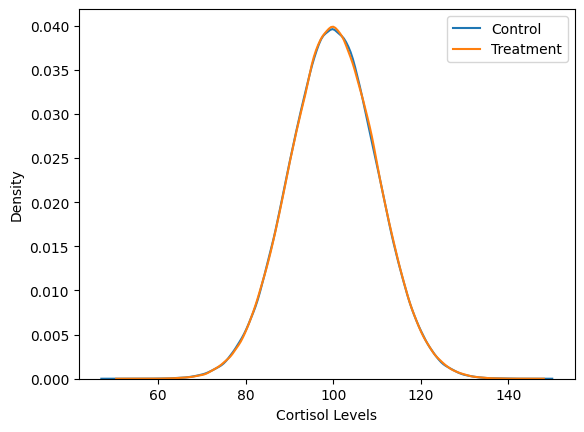

In [ ]:
# Create overlapping density plots for both columns
sns.kdeplot(df_signif['x'], label = 'Control')
sns.kdeplot(df_signif['y'], label = 'Treatment')

# Add labels and title
plt.xlabel('Cortisol Levels')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
df_signif.describe()

,x,y
count,500000.000000,500000.000000
mean,99.985404,100.026409
std,10.005915,9.997656
min,49.255899,52.643425
25%,93.233436,93.281932
50%,99.982942,100.001672
75%,106.731076,106.801444
max,147.844632,145.918463


Do you think this treatment is worth it?

## Section 2: When Visualizing RUINS EVERYTHING AND BREAKS SCIENCE


In [ ]:
# Load the Ames Housing dataset
ames = pd.read_csv("https://raw.githubusercontent.com/emmaklugman/datasets/main/AmesHousing.csv")

# Extracting some interesting numeric columns and renaming them for better interpretability
selected_columns = {
    'SalePrice': 'Sale Price',
    'Gr Liv Area': 'Above Ground Living Area (sq ft)',
    'Overall Qual': 'Overall Quality',
    'Garage Cars': 'Garage Size (Cars)',
    'Year Built': 'Year Built',
    'Total Bsmt SF': 'Total Basement Area (sq ft)',
    '1st Flr SF': 'First Floor Area (sq ft)',
    'Lot Area': 'Lot Area (sq ft)',
    'Fireplaces': 'Number of Fireplaces',
    'Garage Area': 'Garage Area (sq ft)',
    'Full Bath': 'Full Bathrooms',
    'TotRms AbvGrd': 'Total Rooms Above Ground'
}
selected_data = ames[list(selected_columns.keys())].rename(columns=selected_columns)

# Display summary of the selected and renamed data
print(selected_data.head())

   Sale Price  Above Ground Living Area (sq ft)  Overall Quality  \
0      215000                              1656                6   
1      105000                               896                5   
2      172000                              1329                6   
3      244000                              2110                7   
4      189900                              1629                5   

   Garage Size (Cars)  Year Built  Total Basement Area (sq ft)  \
0                 2.0        1960                       1080.0   
1                 1.0        1961                        882.0   
2                 1.0        1958                       1329.0   
3                 2.0        1968                       2110.0   
4                 2.0        1997                        928.0   

   First Floor Area (sq ft)  Lot Area (sq ft)  Number of Fireplaces  \
0                      1656             31770                     2   
1                       896             11622       

Let's explore this dataset to figure out what bivariate relationships we want to consider. Look at the correlation matrix below, and then write on your slides five questions that you could use this dataset to investigate.

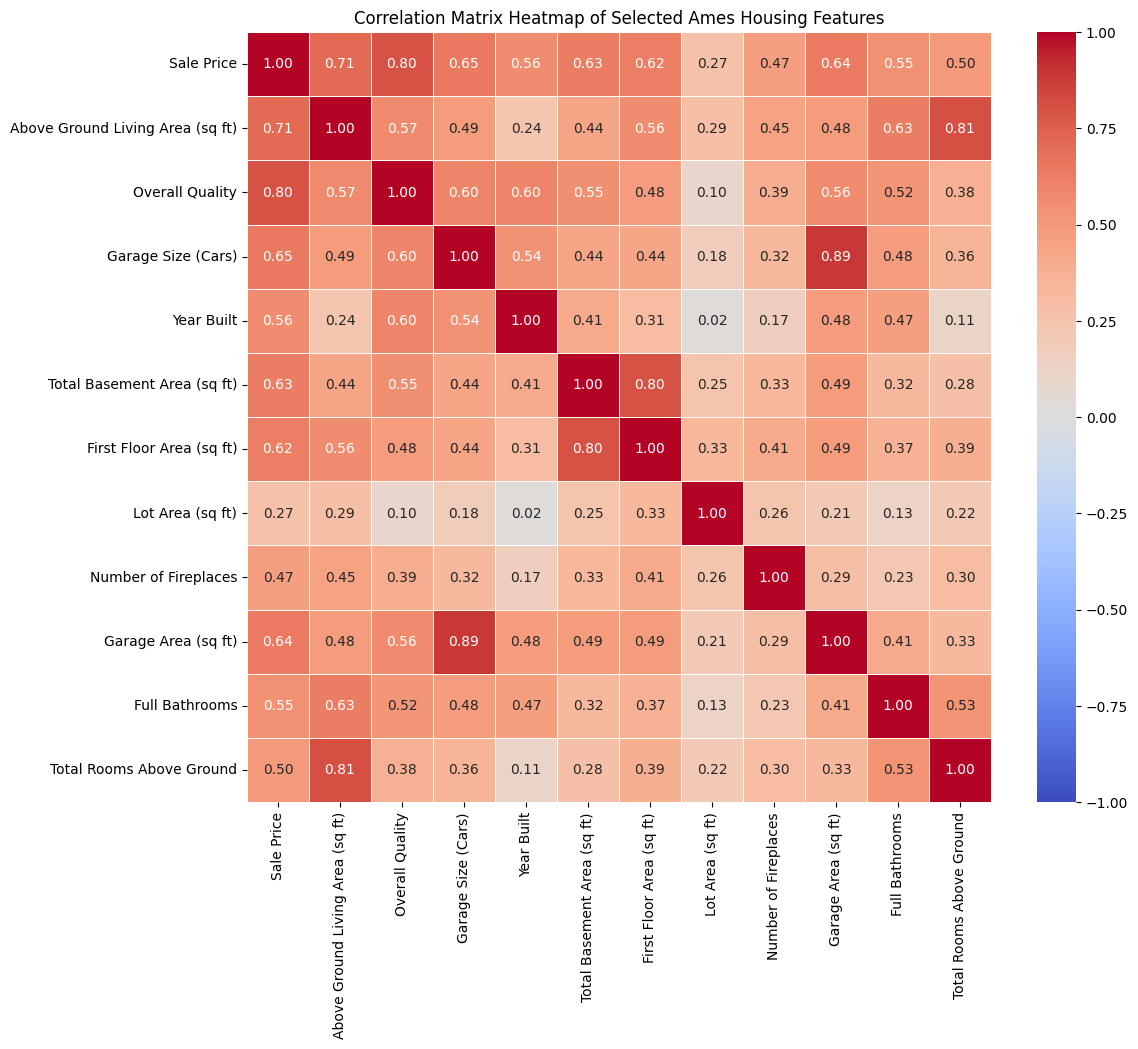

In [ ]:
# Calculate the correlation matrix for the selected data
cor_matrix = selected_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Selected Ames Housing Features')
plt.show()